In [1]:
# Machine Learning for Cap Stone 1 
# Load data saved from Cap1 EDA
import pandas as pd
df = pd.read_csv('data_cap1_ml.csv', sep=',', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774030 entries, 0 to 2774029
Data columns (total 18 columns):
Unnamed: 0                                   int64
BusinessYear                                 int64
StateCode                                    object
PlanId                                       object
RatingAreaId                                 object
Tobacco                                      object
Age                                          object
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
PrimarySubscriberAndOneDependent             float64
PrimarySubscriberAndTwoDependents            float64
PrimarySubscriberAndThreeOrMoreDependents    float64
CoupleAndOneDependent                        float64
CoupleAndTwoDependents                       float64
CoupleAndThreeOrMoreDependents               float64
PlanIdNew                                    obj

In [2]:
# Exam how many people for each age
df['Age'].value_counts()

52             60305
0-20           60305
35             60305
36             60305
37             60305
30             60305
31             60305
32             60305
33             60305
38             60305
39             60305
41             60305
53             60305
40             60305
43             60305
42             60305
45             60305
44             60305
47             60305
46             60305
49             60305
48             60305
34             60305
24             60305
25             60305
26             60305
50             60305
51             60305
56             60305
57             60305
54             60305
55             60305
58             60305
59             60305
64             60305
63             60305
62             60305
61             60305
60             60305
29             60305
28             60305
23             60305
22             60305
21             60305
27             60305
65 and over    60305
Name: Age, dtype: int64

In [3]:
# Only retrieve 5 columns from df dataframe

df_new = df[['StateCode', 'RatingAreaId', 'Age','MetalLevel','IndividualRate']]

In [4]:
# Only look at data for FL state

df_FL = df_new[df_new.StateCode =='FL'].copy()

In [5]:
# change '0-20' to 10, '65 and above' to 70
# Change the Age column to int type
df_FL['Age'].value_counts()
df_FL['Age'] = df_FL['Age'].str.replace('0-20','10')
df_FL['Age'] = df_FL['Age'].str.replace('65 and over','70')
df['Age'].value_counts()
df_FL['Age'] = pd.to_numeric(df_FL['Age'])

In [6]:
# Use dummpy variables for MetalLevel 
df_FL['MetalLevel'].value_counts()
Metal_dummy = pd.get_dummies(df_FL['MetalLevel'])
print(Metal_dummy)

        Bronze  Catastrophic  Gold  Platinum  Silver
171626       0             0     0         0       1
171627       0             0     0         0       1
171628       0             0     0         0       1
171629       0             0     0         0       1
171630       0             0     1         0       0
171631       0             0     1         0       0
171632       0             0     1         0       0
171633       0             0     1         0       0
171634       0             0     0         0       1
171635       0             0     0         0       1
171636       0             0     0         0       1
171637       0             0     0         0       1
171638       0             0     1         0       0
171639       0             0     1         0       0
171640       0             0     1         0       0
171641       0             0     1         0       0
171642       0             0     0         0       1
171643       0             0     0         0  

In [7]:
df_FL = pd.concat([df_FL, Metal_dummy], axis = 1) 
df_FL.head()

,StateCode,RatingAreaId,Age,MetalLevel,IndividualRate,Bronze,Catastrophic,Gold,Platinum,Silver
171626,FL,Rating Area 1,10,Silver,181.98,0,0,0,0,1
171627,FL,Rating Area 1,10,Silver,185.38,0,0,0,0,1
171628,FL,Rating Area 1,10,Silver,188.85,0,0,0,0,1
171629,FL,Rating Area 1,10,Silver,192.38,0,0,0,0,1
171630,FL,Rating Area 1,10,Gold,202.27,0,0,1,0,0


In [8]:
# FL has about 60 rating areas
df_FL['RatingAreaId'].value_counts()

Rating Area 5     38962
Rating Area 64    33488
Rating Area 17    33028
Rating Area 30    27278
Rating Area 57    14582
Rating Area 6      5796
Rating Area 50     5796
Rating Area 43     5612
Rating Area 48     3910
Rating Area 49     3910
Rating Area 51     3910
Rating Area 34     3910
Rating Area 53     3910
Rating Area 52     3910
Rating Area 28     3910
Rating Area 42     3634
Rating Area 56     3634
Rating Area 26     3634
Rating Area 8      3496
Rating Area 15     3450
Rating Area 60     3358
Rating Area 2      3220
Rating Area 9      3220
Rating Area 58     3220
Rating Area 59     3220
Rating Area 35     3220
Rating Area 10     3220
Rating Area 11     3220
Rating Area 41     3220
Rating Area 40     3220
                  ...  
Rating Area 1      2806
Rating Area 47     2806
Rating Area 61     2530
Rating Area 20     2530
Rating Area 14     2530
Rating Area 37     2530
Rating Area 25     2530
Rating Area 12     2530
Rating Area 13     2530
Rating Area 27     2484
Rating Area 22  

In [9]:
# Calculate mean individualrate for each rating area in FL. 
# I am going to use RatingAreaId as category variable.

grp1 = df_FL.groupby('RatingAreaId').mean()
grp1 = grp1.sort_values('IndividualRate', ascending=True)
print(grp1.IndividualRate)

RatingAreaId
Rating Area 41    447.086553
Rating Area 1     458.541297
Rating Area 36    459.394797
Rating Area 28    460.920003
Rating Area 4     462.341996
Rating Area 26    463.511211
Rating Area 50    466.120547
Rating Area 56    466.693855
Rating Area 10    467.064550
Rating Area 40    467.725134
Rating Area 63    468.942765
Rating Area 9     469.607444
Rating Area 15    470.401293
Rating Area 34    471.935946
Rating Area 51    472.449146
Rating Area 52    473.359123
Rating Area 8     473.805561
Rating Area 22    473.954216
Rating Area 3     474.551413
Rating Area 6     476.710138
Rating Area 55    476.941285
Rating Area 62    478.760747
Rating Area 30    479.953088
Rating Area 2     480.241978
Rating Area 46    485.287497
Rating Area 54    486.731198
Rating Area 67    487.837341
Rating Area 64    487.913169
Rating Area 60    488.064148
Rating Area 11    488.480407
                     ...    
Rating Area 43    492.492024
Rating Area 31    492.574693
Rating Area 17    493.171962
R

In [10]:
df_FL['RatingAreaId'] = df_FL['RatingAreaId'].astype('category')
rating_dummy = pd.get_dummies(df_FL['RatingAreaId'])
print(rating_dummy.head())

        Rating Area 1  Rating Area 10  Rating Area 11  Rating Area 12  \
171626              1               0               0               0   
171627              1               0               0               0   
171628              1               0               0               0   
171629              1               0               0               0   
171630              1               0               0               0   

        Rating Area 13  Rating Area 14  Rating Area 15  Rating Area 16  \
171626               0               0               0               0   
171627               0               0               0               0   
171628               0               0               0               0   
171629               0               0               0               0   
171630               0               0               0               0   

        Rating Area 17  Rating Area 18      ...        Rating Area 61  \
171626               0               0     

In [11]:
# Merge df_FL with dummy dataframe
df_FL = pd.concat([df_FL, rating_dummy], axis = 1) 
df_FL.head()

,StateCode,RatingAreaId,Age,MetalLevel,IndividualRate,Bronze,Catastrophic,Gold,Platinum,Silver,...,Rating Area 61,Rating Area 62,Rating Area 63,Rating Area 64,Rating Area 65,Rating Area 66,Rating Area 67,Rating Area 7,Rating Area 8,Rating Area 9
171626,FL,Rating Area 1,10,Silver,181.98,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
171627,FL,Rating Area 1,10,Silver,185.38,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
171628,FL,Rating Area 1,10,Silver,188.85,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
171629,FL,Rating Area 1,10,Silver,192.38,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
171630,FL,Rating Area 1,10,Gold,202.27,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_FL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325588 entries, 171626 to 497213
Data columns (total 77 columns):
StateCode         325588 non-null object
RatingAreaId      325588 non-null category
Age               325588 non-null int64
MetalLevel        325588 non-null object
IndividualRate    325588 non-null float64
Bronze            325588 non-null uint8
Catastrophic      325588 non-null uint8
Gold              325588 non-null uint8
Platinum          325588 non-null uint8
Silver            325588 non-null uint8
Rating Area 1     325588 non-null uint8
Rating Area 10    325588 non-null uint8
Rating Area 11    325588 non-null uint8
Rating Area 12    325588 non-null uint8
Rating Area 13    325588 non-null uint8
Rating Area 14    325588 non-null uint8
Rating Area 15    325588 non-null uint8
Rating Area 16    325588 non-null uint8
Rating Area 17    325588 non-null uint8
Rating Area 18    325588 non-null uint8
Rating Area 19    325588 non-null uint8
Rating Area 2     325588 non-null uin

In [13]:
df_FL.keys()

Index([u'StateCode', u'RatingAreaId', u'Age', u'MetalLevel', u'IndividualRate',
       u'Bronze', u'Catastrophic', u'Gold', u'Platinum', u'Silver',
       u'Rating Area 1', u'Rating Area 10', u'Rating Area 11',
       u'Rating Area 12', u'Rating Area 13', u'Rating Area 14',
       u'Rating Area 15', u'Rating Area 16', u'Rating Area 17',
       u'Rating Area 18', u'Rating Area 19', u'Rating Area 2',
       u'Rating Area 20', u'Rating Area 21', u'Rating Area 22',
       u'Rating Area 23', u'Rating Area 24', u'Rating Area 25',
       u'Rating Area 26', u'Rating Area 27', u'Rating Area 28',
       u'Rating Area 29', u'Rating Area 3', u'Rating Area 30',
       u'Rating Area 31', u'Rating Area 32', u'Rating Area 33',
       u'Rating Area 34', u'Rating Area 35', u'Rating Area 36',
       u'Rating Area 37', u'Rating Area 38', u'Rating Area 39',
       u'Rating Area 4', u'Rating Area 40', u'Rating Area 41',
       u'Rating Area 42', u'Rating Area 43', u'Rating Area 44',
       u'Rating Area 45'

In [14]:
# import modules for machine learning

%matplotlib inline 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR

In [29]:
# This function returns a simple linear regression model object
def simple_linear_reg():
    reg = LinearRegression();
    return reg


In [33]:
# This function returns R^2 and Root Mean Squared Error from a machine learning model
# The input parameters are dataframe, and machine learning model

def machine_learning_func ( data_set, func):
    
    # prepare features and target variable for machine learning
    X = data_set.drop(['StateCode', 'RatingAreaId', 'MetalLevel','IndividualRate'], axis=1)
    y = data_set['IndividualRate']
    
    # split training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)
   
    #fit the model to training data
    model = func()
    model.fit(X_train, y_train)

    # Predict on the test data: y_pred
    y_pred = model.predict(X_test)

    # Compute and print R^2 and RMSE
    print("R^2: {}".format(model.score(X_test, y_test)));
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error: {}".format(rmse));
    
    # The coefficients
    if hasattr(model, 'coef_'):
        print("\nThe coefficients are:")
        print(pd.DataFrame({'features': X.columns, 'estimatedCoefficients': model.coef_})[['features', 'estimatedCoefficients']]);

    # The estimated intercept
    if hasattr(model, 'intercept_'):
        print("The estimated intercep = {}".format(model.intercept_));

    # The predicted and true individual rates seemed to have linear relationship
    fig = plt.figure(figsize=(16, 6))
    plt.subplot(1,2,1)
    plt.plot(y_test, y_pred, marker='.', linestyle='none')
    plt.title("Relationship between True and Predicted IndividualRate")
    plt.xlabel("True IndividualRate")
    plt.ylabel("Predicted IndividualRate")
    
    
    resid = y_pred - y_test
    plt.subplot(1,2,2)
    plt.hist(resid, bins=30)
    plt.xlabel("Residual from the model")
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

    return "finish"


R^2: 0.821486052483
Root Mean Squared Error: 94.0087028031

The coefficients are:
          features  estimatedCoefficients
0              Age           1.326463e+01
1           Bronze          -2.507991e+12
2     Catastrophic          -2.507991e+12
3             Gold          -2.507991e+12
4         Platinum          -2.507991e+12
5           Silver          -2.507991e+12
6    Rating Area 1           4.427751e+11
7   Rating Area 10           4.427751e+11
8   Rating Area 11           4.427751e+11
9   Rating Area 12           4.427751e+11
10  Rating Area 13           4.427751e+11
11  Rating Area 14           4.427751e+11
12  Rating Area 15           4.427751e+11
13  Rating Area 16           4.427751e+11
14  Rating Area 17           4.427751e+11
15  Rating Area 18           4.427751e+11
16  Rating Area 19           4.427751e+11
17   Rating Area 2           4.427751e+11
18  Rating Area 20           4.427751e+11
19  Rating Area 21           4.427751e+11
20  Rating Area 22           4.42775

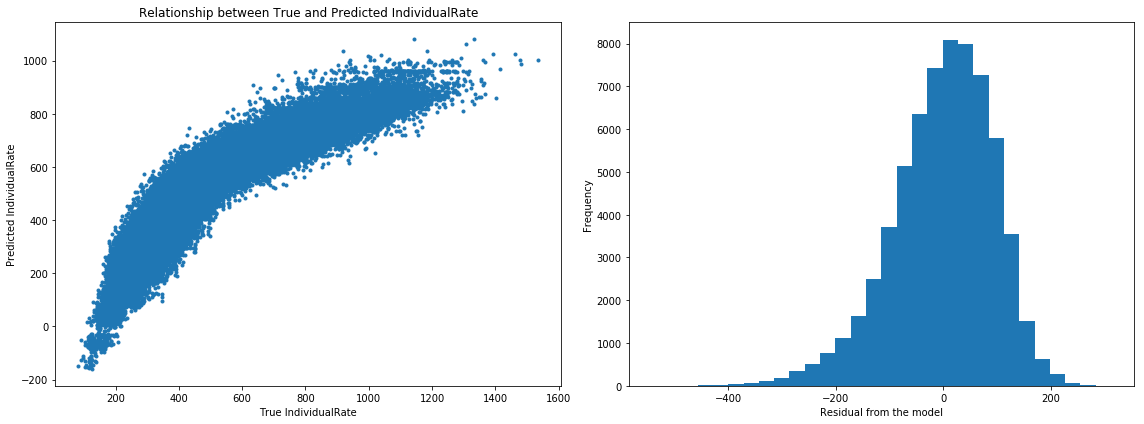

'finish'

In [17]:
machine_learning_func ( df_FL, simple_linear_reg)

In [18]:
# From the diagnosis plots, we can not assume a simple linear regression model. 
# Method 1 to improve the model is normalizing features. 
# All dummy variables vary from 0 to 1, while Ages vary from 10 to 70.
# I will divide age by 100, so Age is also in [0,1] framework

df_FL_1 = df_FL.copy()
df_FL_1['Age'] = df_FL_1['Age']/100
df_FL_1.head(5)

,StateCode,RatingAreaId,Age,MetalLevel,IndividualRate,Bronze,Catastrophic,Gold,Platinum,Silver,...,Rating Area 61,Rating Area 62,Rating Area 63,Rating Area 64,Rating Area 65,Rating Area 66,Rating Area 67,Rating Area 7,Rating Area 8,Rating Area 9
171626,FL,Rating Area 1,0.1,Silver,181.98,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
171627,FL,Rating Area 1,0.1,Silver,185.38,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
171628,FL,Rating Area 1,0.1,Silver,188.85,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
171629,FL,Rating Area 1,0.1,Silver,192.38,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
171630,FL,Rating Area 1,0.1,Gold,202.27,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


R^2: 0.821485647593
Root Mean Squared Error: 94.0088094143

The coefficients are:
          features  estimatedCoefficients
0              Age           1.326463e+03
1           Bronze          -2.300814e+12
2     Catastrophic          -2.300814e+12
3             Gold          -2.300814e+12
4         Platinum          -2.300814e+12
5           Silver          -2.300814e+12
6    Rating Area 1           6.053318e+10
7   Rating Area 10           6.053318e+10
8   Rating Area 11           6.053318e+10
9   Rating Area 12           6.053318e+10
10  Rating Area 13           6.053318e+10
11  Rating Area 14           6.053318e+10
12  Rating Area 15           6.053318e+10
13  Rating Area 16           6.053318e+10
14  Rating Area 17           6.053318e+10
15  Rating Area 18           6.053318e+10
16  Rating Area 19           6.053318e+10
17   Rating Area 2           6.053318e+10
18  Rating Area 20           6.053318e+10
19  Rating Area 21           6.053318e+10
20  Rating Area 22           6.05331

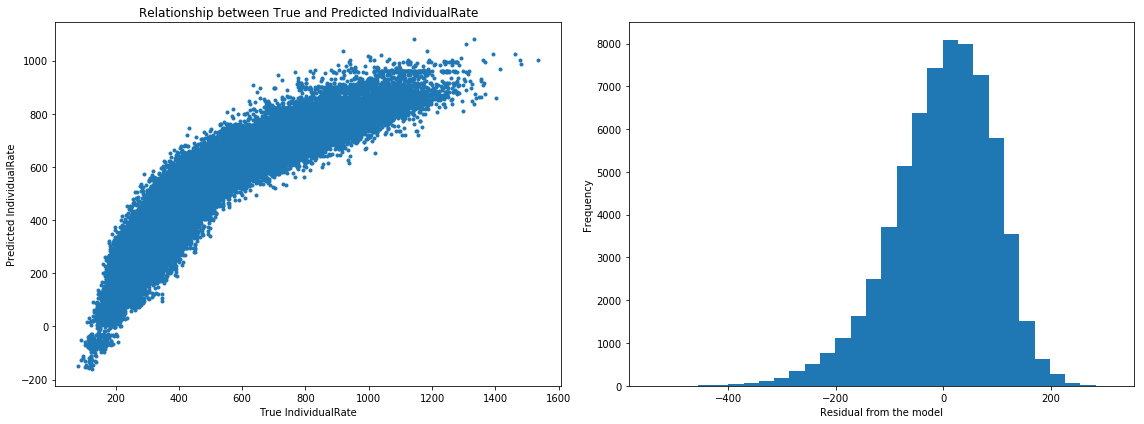

'finish'

In [19]:
machine_learning_func ( df_FL_1, simple_linear_reg)

In [20]:
# Normalization of features does not improve the model.
# Method 2 is to use log transformation on the target variable (IndividualRate)

df_FL_2 = df_FL.copy()
df_FL_2['IndividualRate'] = df_FL_2['IndividualRate'].apply(np.log).copy()
df_FL_2.head(5)

,StateCode,RatingAreaId,Age,MetalLevel,IndividualRate,Bronze,Catastrophic,Gold,Platinum,Silver,...,Rating Area 61,Rating Area 62,Rating Area 63,Rating Area 64,Rating Area 65,Rating Area 66,Rating Area 67,Rating Area 7,Rating Area 8,Rating Area 9
171626,FL,Rating Area 1,10,Silver,5.203897,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
171627,FL,Rating Area 1,10,Silver,5.222408,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
171628,FL,Rating Area 1,10,Silver,5.240953,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
171629,FL,Rating Area 1,10,Silver,5.259473,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
171630,FL,Rating Area 1,10,Gold,5.309603,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


R^2: 0.899289350125
Root Mean Squared Error: 0.138196304404

The coefficients are:
          features  estimatedCoefficients
0              Age           2.680052e-02
1           Bronze          -6.302355e+09
2     Catastrophic          -6.302355e+09
3             Gold          -6.302355e+09
4         Platinum          -6.302355e+09
5           Silver          -6.302355e+09
6    Rating Area 1           7.096813e+08
7   Rating Area 10           7.096813e+08
8   Rating Area 11           7.096813e+08
9   Rating Area 12           7.096813e+08
10  Rating Area 13           7.096813e+08
11  Rating Area 14           7.096813e+08
12  Rating Area 15           7.096813e+08
13  Rating Area 16           7.096813e+08
14  Rating Area 17           7.096813e+08
15  Rating Area 18           7.096813e+08
16  Rating Area 19           7.096813e+08
17   Rating Area 2           7.096813e+08
18  Rating Area 20           7.096813e+08
19  Rating Area 21           7.096813e+08
20  Rating Area 22           7.0968

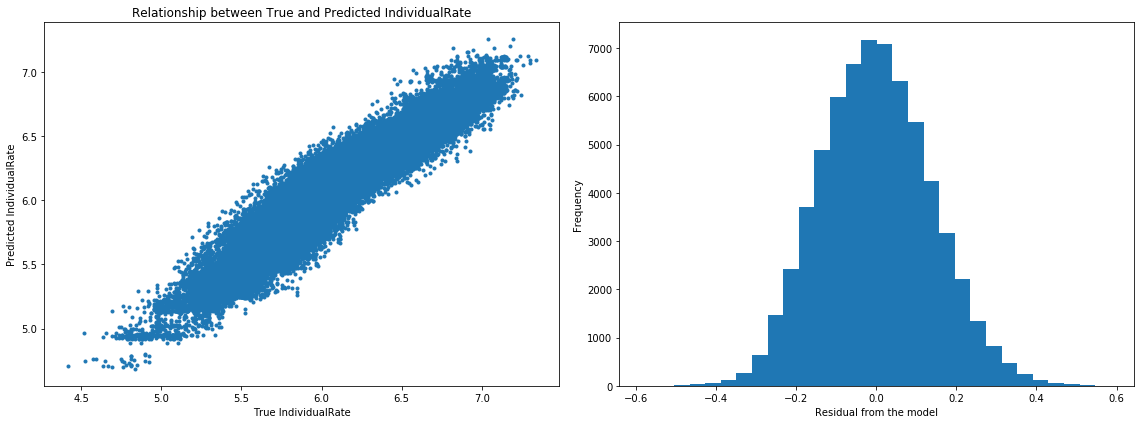

'finish'

In [21]:
machine_learning_func ( df_FL_2, simple_linear_reg)

R^2: 0.899285495927
Root Mean Squared Error: 0.138198948765

The coefficients are:
          features  estimatedCoefficients
0              Age               0.026798
1           Bronze              -0.262155
2     Catastrophic              -0.493560
3             Gold               0.118970
4         Platinum               0.227477
5           Silver              -0.037556
6    Rating Area 1              -0.043749
7   Rating Area 10              -0.035108
8   Rating Area 11               0.015680
9   Rating Area 12               0.008615
10  Rating Area 13               0.025514
11  Rating Area 14               0.072398
12  Rating Area 15              -0.029191
13  Rating Area 16               0.002755
14  Rating Area 17              -0.014968
15  Rating Area 18               0.062495
16  Rating Area 19               0.064511
17   Rating Area 2              -0.004592
18  Rating Area 20               0.059156
19  Rating Area 21               0.090825
20  Rating Area 22              -0.

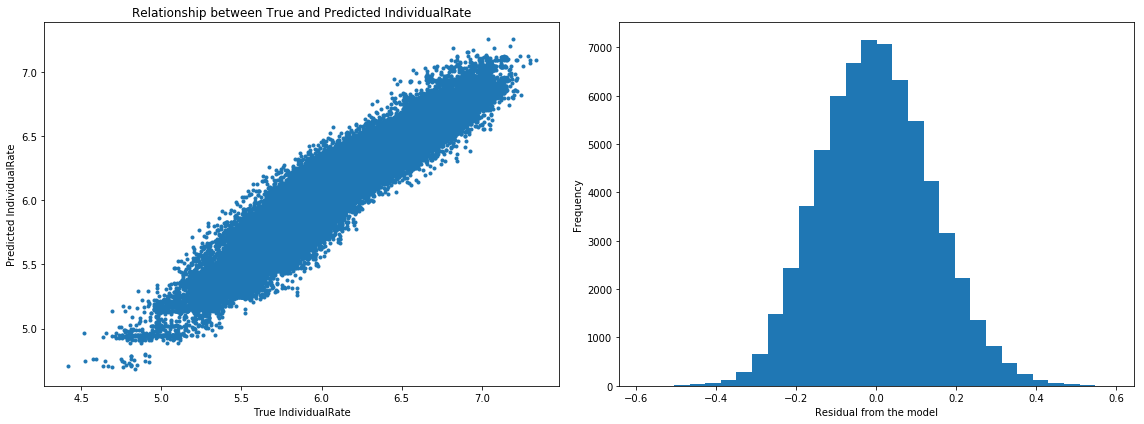

'finish'

In [22]:
# This function returns Ridge regression model object
def ridge_reg():
    reg = Ridge(alpha=0.0001, normalize=True);
    return reg

machine_learning_func ( df_FL_2, ridge_reg)

R^2: 0.899180706301
Root Mean Squared Error: 0.13827082546

The coefficients are:
          features  estimatedCoefficients
0              Age               0.026764
1           Bronze              -0.224092
2     Catastrophic              -0.452839
3             Gold               0.155054
4         Platinum               0.263003
5           Silver              -0.000000
6    Rating Area 1              -0.039102
7   Rating Area 10              -0.030847
8   Rating Area 11               0.009791
9   Rating Area 12               0.002135
10  Rating Area 13               0.019031
11  Rating Area 14               0.065929
12  Rating Area 15              -0.025095
13  Rating Area 16               0.000000
14  Rating Area 17              -0.013986
15  Rating Area 18               0.054864
16  Rating Area 19               0.056882
17   Rating Area 2              -0.000262
18  Rating Area 20               0.052607
19  Rating Area 21               0.083197
20  Rating Area 22              -0.0

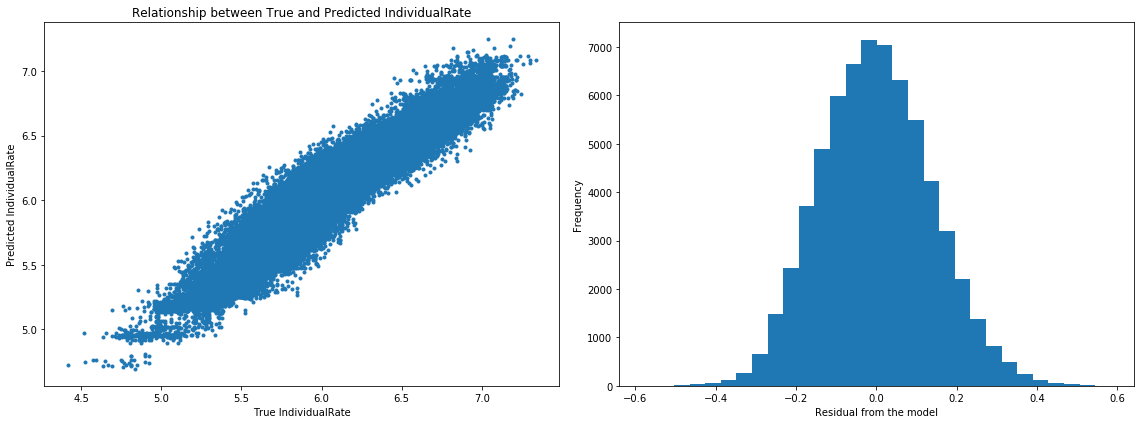

'finish'

In [23]:
# This function returns Lasso regression model object
def lasso_reg():
    reg = Lasso(alpha=0.000001, normalize=True);
    return reg

machine_learning_func ( df_FL_2, lasso_reg)

c:\users\jijun\appdata\local\continuum\miniconda2\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


R^2: 0.775204423864
Root Mean Squared Error: 0.206467933189

The coefficients are:
          features  estimatedCoefficients
0              Age               0.028290
1           Bronze               0.650064
2     Catastrophic               0.417064
3             Gold               1.022142
4         Platinum               1.138467
5           Silver               0.869345
6    Rating Area 1               0.000115
7   Rating Area 10               0.012649
8   Rating Area 11               0.059768
9   Rating Area 12               0.044707
10  Rating Area 13               0.066654
11  Rating Area 14               0.125115
12  Rating Area 15               0.016492
13  Rating Area 16               0.048826
14  Rating Area 17               0.029622
15  Rating Area 18               0.111861
16  Rating Area 19               0.103657
17   Rating Area 2               0.038789
18  Rating Area 20               0.106863
19  Rating Area 21               0.133763
20  Rating Area 22               0.

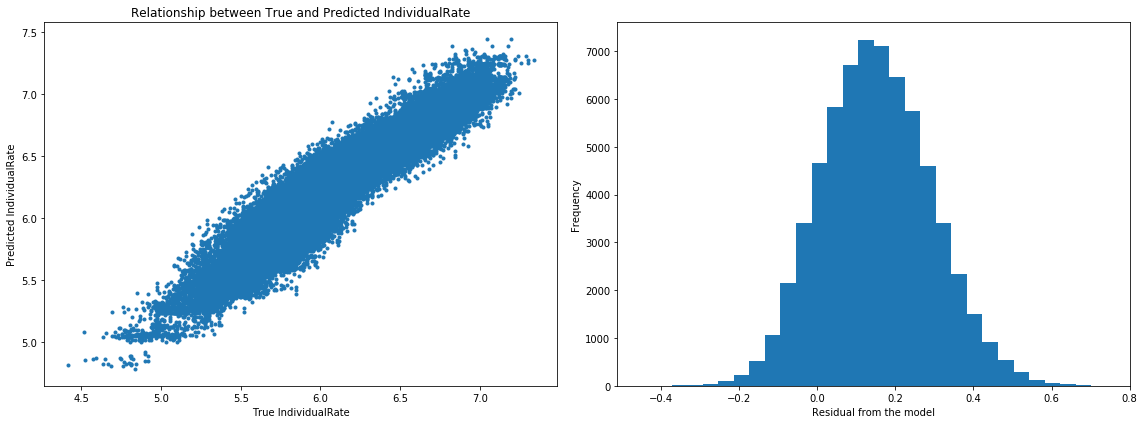

'finish'

In [24]:
from sklearn.svm import LinearSVR
def LinearSVR_reg():
    reg = LinearSVR(tol=1e-5);
    return reg

machine_learning_func ( df_FL_2, LinearSVR_reg)

In [25]:
# This function returns Support Vector regression model object
def SVM_reg():
    reg = SVR(kernel='linear',degree=1);
    return reg

# machine_learning_func ( df_FL_2, SVM_reg)
# This function never finishes 

c:\users\jijun\appdata\local\continuum\miniconda2\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


R^2: 0.812396218346
Root Mean Squared Error: 0.188616431695

The coefficients are:
          features  estimatedCoefficients
0              Age               0.022139
1           Bronze               0.644006
2     Catastrophic               0.414202
3             Gold               1.027895
4         Platinum               1.134589
5           Silver               0.873308
6    Rating Area 1              -0.002096
7   Rating Area 10               0.008620
8   Rating Area 11               0.065701
9   Rating Area 12               0.046958
10  Rating Area 13               0.066506
11  Rating Area 14               0.120475
12  Rating Area 15               0.025577
13  Rating Area 16               0.046202
14  Rating Area 17               0.032181
15  Rating Area 18               0.107113
16  Rating Area 19               0.108658
17   Rating Area 2               0.039649
18  Rating Area 20               0.097961
19  Rating Area 21               0.134833
20  Rating Area 22               0.

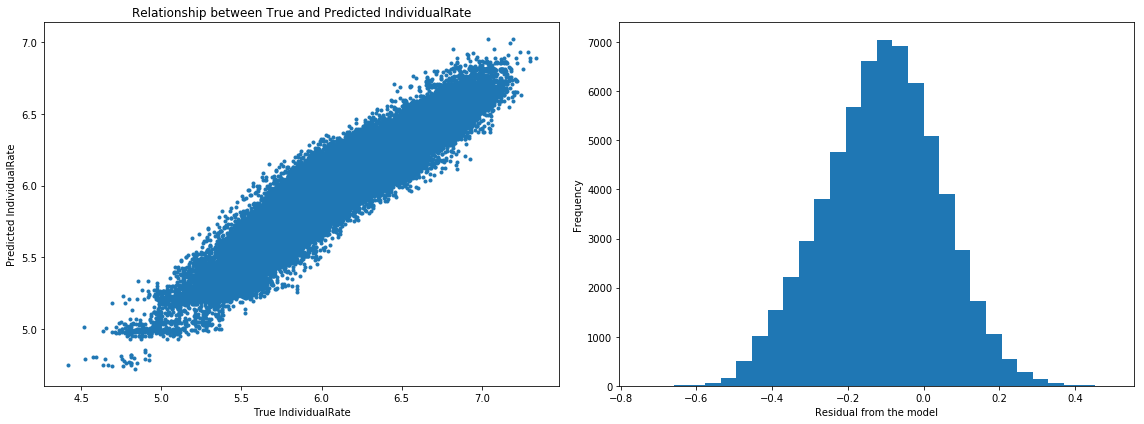

'finish'

In [26]:
from sklearn.svm import LinearSVR
# This function returns LinearSVR model, default paramters will be used
def LinearSVR_reg():
    reg = LinearSVR()
    return reg

machine_learning_func ( df_FL_2, LinearSVR_reg)

R^2: 0.932165461157
Root Mean Squared Error: 0.113418570352


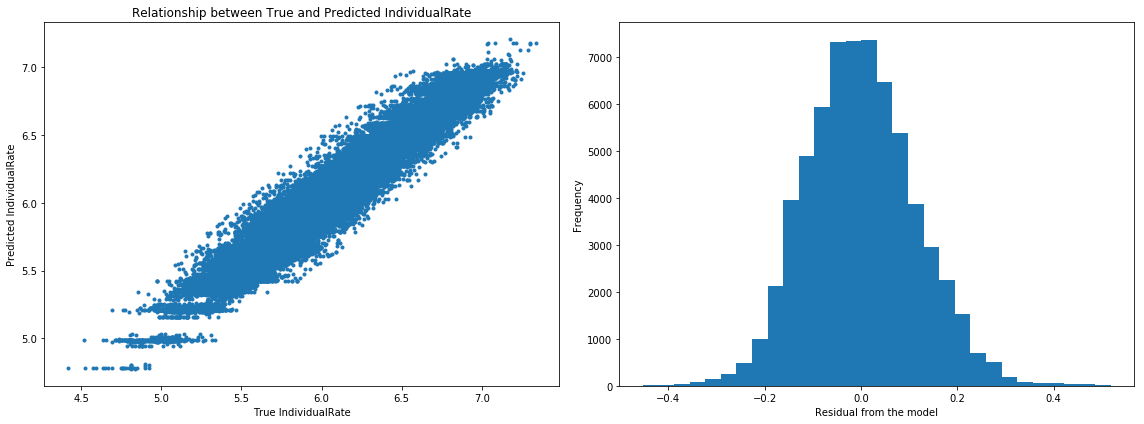

'finish'

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
def GradientBoosting_reg():
    reg = GradientBoostingRegressor(n_estimators=100);
    return reg

machine_learning_func ( df_FL_2, GradientBoosting_reg)

R^2: 0.932165217834
Root Mean Squared Error: 0.113418773769


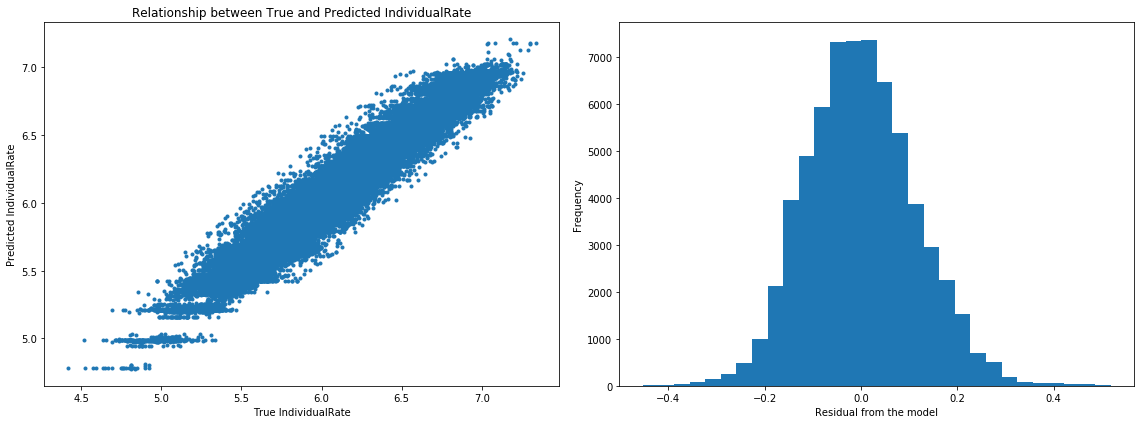

'finish'

In [44]:
# define another function for GradientBoostingregressor with tuned parameters
def GradientBoosting_reg_2():
    reg = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=1.0,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False);
    return reg

machine_learning_func ( df_FL_2, GradientBoosting_reg_2)